In [1]:
import pandas as pd

# Load the datasets
training_data_path = "C:/Users/hussien/OneDrive/Desktop/twitter_training.csv"
validation_data_path = "C:/Users/hussien/OneDrive/Desktop/twitter_validation.csv"

# Read the data
training_data = pd.read_csv(training_data_path)
validation_data = pd.read_csv(validation_data_path)

# Display the first few rows of both datasets to understand the structure
training_data_head = training_data.head()
validation_data_head = validation_data.head()

training_data_head, validation_data_head


(   2401  Borderlands  Positive  \
 0  2401  Borderlands  Positive   
 1  2401  Borderlands  Positive   
 2  2401  Borderlands  Positive   
 3  2401  Borderlands  Positive   
 4  2401  Borderlands  Positive   
 
   im getting on borderlands and i will murder you all ,  
 0  I am coming to the borders and I will kill you...     
 1  im getting on borderlands and i will kill you ...     
 2  im coming on borderlands and i will murder you...     
 3  im getting on borderlands 2 and i will murder ...     
 4  im getting into borderlands and i can murder y...     ,
    3364   Facebook Irrelevant  \
 0   352     Amazon    Neutral   
 1  8312  Microsoft   Negative   
 2  4371      CS-GO   Negative   
 3  4433     Google    Neutral   
 4  6273       FIFA   Negative   
 
   I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy,

In [2]:
# Renaming columns for better understanding
# For the training data, it appears that the columns are misaligned
training_data.columns = ['Index', 'Brand', 'Sentiment', 'Text']
validation_data.columns = ['Index', 'Brand', 'Sentiment', 'Text']

# Display the first few rows after renaming the columns
training_data_cleaned = training_data[['Brand', 'Sentiment', 'Text']].head()
validation_data_cleaned = validation_data[['Brand', 'Sentiment', 'Text']].head()

training_data_cleaned, validation_data_cleaned


(         Brand Sentiment                                               Text
 0  Borderlands  Positive  I am coming to the borders and I will kill you...
 1  Borderlands  Positive  im getting on borderlands and i will kill you ...
 2  Borderlands  Positive  im coming on borderlands and i will murder you...
 3  Borderlands  Positive  im getting on borderlands 2 and i will murder ...
 4  Borderlands  Positive  im getting into borderlands and i can murder y...,
        Brand Sentiment                                               Text
 0     Amazon   Neutral  BBC News - Amazon boss Jeff Bezos rejects clai...
 1  Microsoft  Negative  @Microsoft Why do I pay for WORD when it funct...
 2      CS-GO  Negative  CSGO matchmaking is so full of closet hacking,...
 3     Google   Neutral  Now the President is slapping Americans in the...
 4       FIFA  Negative  Hi @EAHelp I’ve had Madeleine McCann in my cel...)

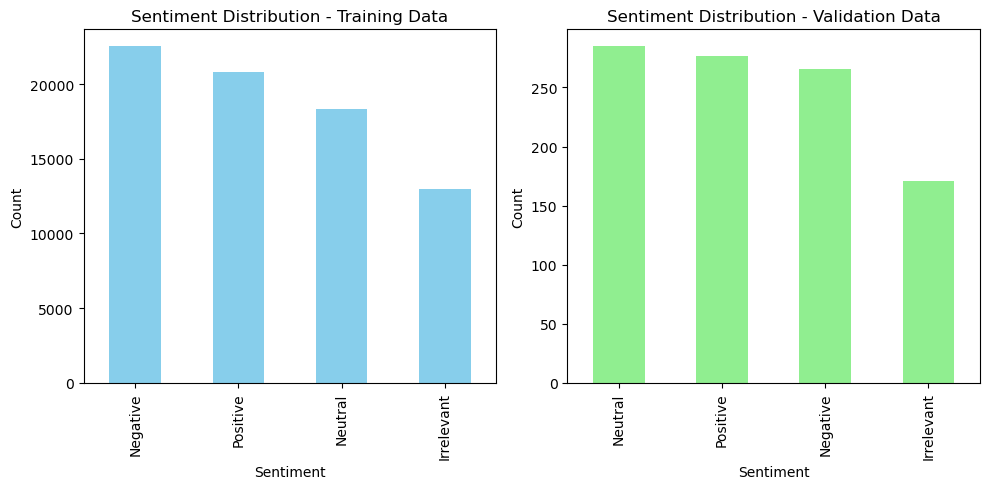

In [3]:
import matplotlib.pyplot as plt

# Count of sentiment labels in training and validation data
training_sentiment_counts = training_data['Sentiment'].value_counts()
validation_sentiment_counts = validation_data['Sentiment'].value_counts()

# Plotting the sentiment distribution for training data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
training_sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Sentiment Distribution - Training Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Plotting the sentiment distribution for validation data
plt.subplot(1, 2, 2)
validation_sentiment_counts.plot(kind='bar', color='lightgreen')
plt.title('Sentiment Distribution - Validation Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

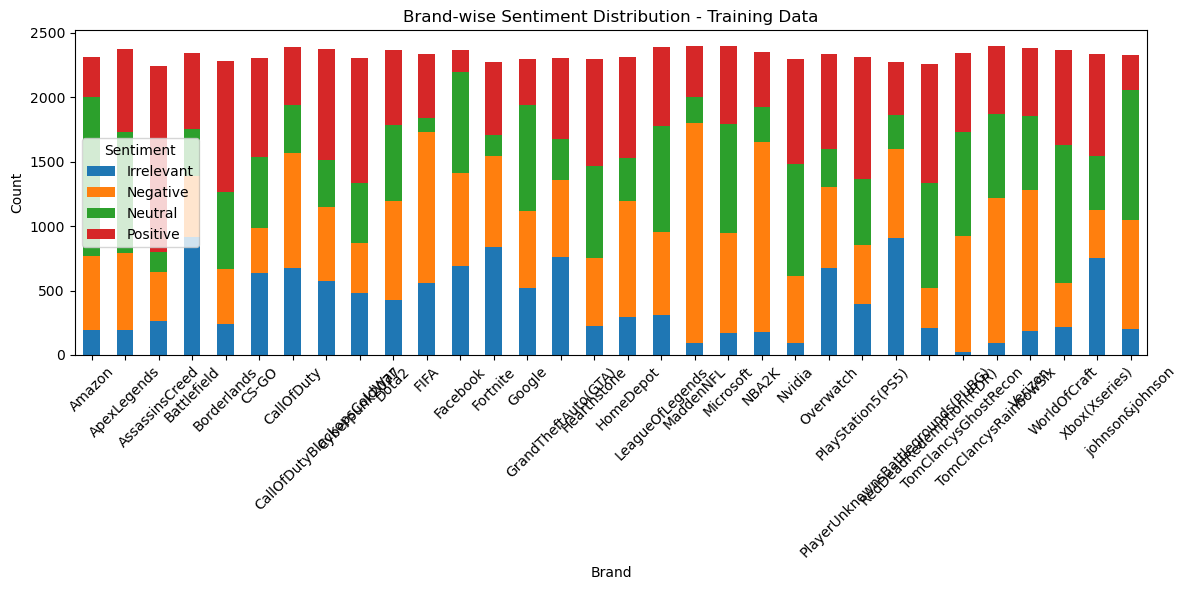

<Figure size 1200x600 with 0 Axes>

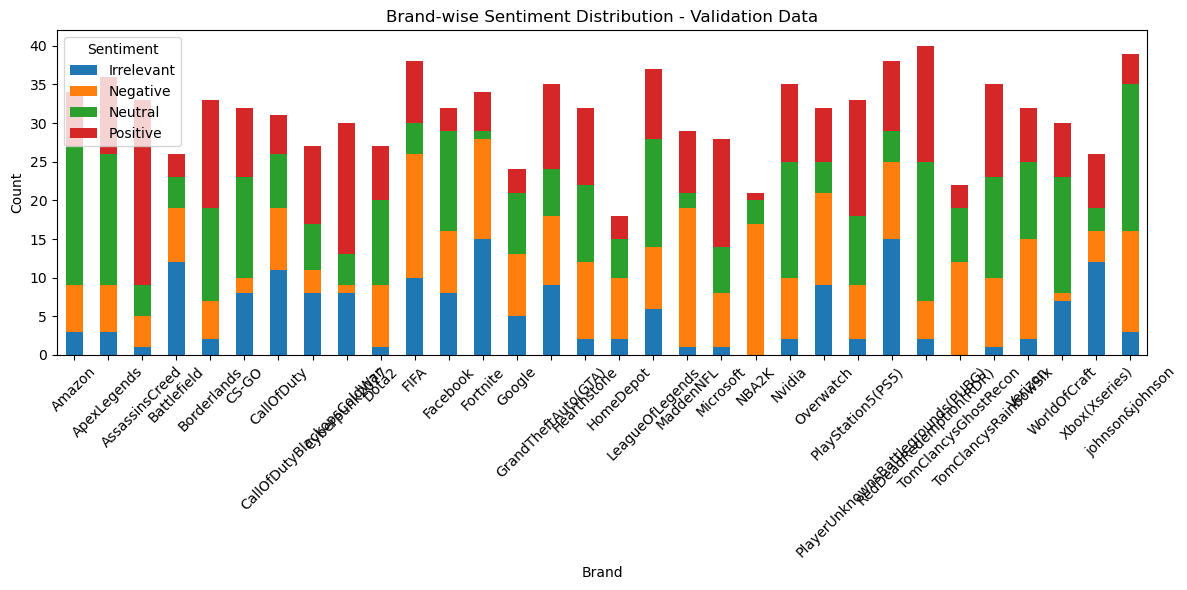

In [4]:
# Grouping by Brand and Sentiment to count occurrences
training_brand_sentiment = training_data.groupby(['Brand', 'Sentiment']).size().unstack(fill_value=0)
validation_brand_sentiment = validation_data.groupby(['Brand', 'Sentiment']).size().unstack(fill_value=0)

# Plotting Brand-wise Sentiment Distribution for Training Data
plt.figure(figsize=(12, 6))
training_brand_sentiment.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Brand-wise Sentiment Distribution - Training Data')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Brand-wise Sentiment Distribution for Validation Data
plt.figure(figsize=(12, 6))
validation_brand_sentiment.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Brand-wise Sentiment Distribution - Validation Data')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
from wordcloud import WordCloud
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk